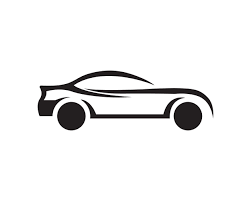

  # Car Price Prediction System

In this Project, we are going to predict the Price of Used Cars using various features.

To be able to predict used cars market value can help both buyers and sellers.

There are lots of individuals who are interested in the used car market at some points in their life because they wanted to sell their car or buy a used car. In this process, it’s a big corner to pay too much or sell less then it’s market value.

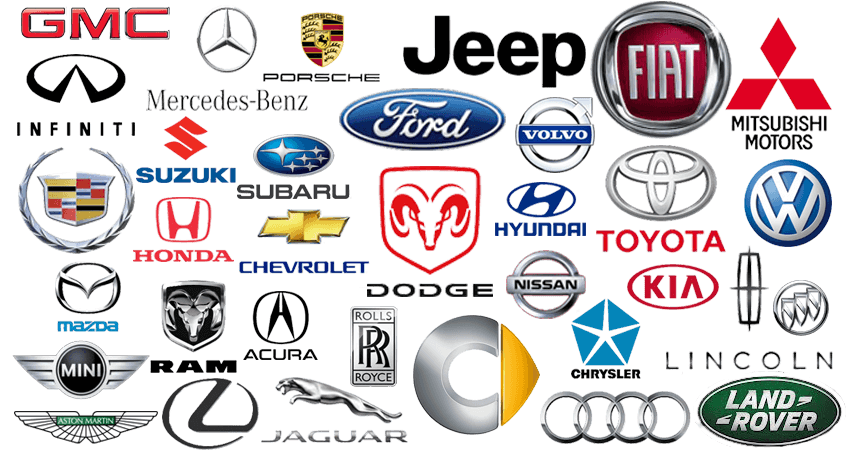

### Business Goal
You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Import libraries

I'll import numpy to work with arrays and pandas to read in the dataset files, matplotlib & seaborn for plotting and sklearn for various machine learning models.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Read dataset
I'll read the dataset and get information about it.

In [2]:
Data=pd.read_csv("CarPrice_Assignment.csv")

The dataset CarPrice_Assignment.csv named as Data contains:

Car_ID:         Unique id of each observation (Interger)		
Symboling:      Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty               safe.(Categorical) 		
carCompany:     Name of car company (Categorical)		
fueltype:	    Car fuel type i.e gas or diesel (Categorical)		
aspiration:	    Aspiration used in a car (Categorical)		
doornumber:	    Number of doors in a car (Categorical)		
carbody:	    body of car (Categorical)		
drivewheel:	    type of drive wheel (Categorical)		
enginelocation: Location of car engine (Categorical)		
wheelbase:		Weelbase of car (Numeric)		
carlength:		Length of car (Numeric)		
carwidth:		Width of car (Numeric)		
carheight:		height of car (Numeric)		
curbweight:		The weight of a car without occupants or baggage. (Numeric)		
enginetype:		Type of engine. (Categorical)		
cylindernumber:	cylinder placed in the car (Categorical)		
enginesize:		Size of car (Numeric)		
fuelsystem:		Fuel system of car (Categorical)		
boreratio:		Boreratio of car (Numeric)		
stroke:			Stroke or volume inside the engine (Numeric)		
compressionratio:compression ratio of car (Numeric)		
horsepower:		Horsepower (Numeric)		
peakrpm:		car peak rpm (Numeric)		
citympg:		Mileage in city (Numeric)		
highwaympg:		Mileage on highway (Numeric)		
price:			Price of car (Numeric)		.......# Dependent feature


In [3]:
Data1=Data.copy()

## Basic Checks

In [4]:
Data.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
pd.options.display.max_columns=None

In [6]:
Data.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [7]:
Data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

You can view the first 5 rows of a dataframe using the head() method. Similarly, if you wanted to see the last 5, you can use tail() Also you can view the number of rows and columns in dataframe using shape

In [8]:
Data.shape

(205, 26)

In [9]:
Data.size

5330

In [10]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [11]:
# Create a list to store all numerical variable
numerical_feature = [feature for feature in Data.columns if Data[feature].dtypes not in ['O', 'object'] ]

print("Number of Numerical Variable ", len(numerical_feature))

Data[numerical_feature].head()

Number of Numerical Variable  16


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [12]:
#Let us start by looking at descriptive statistic parameters for the dataset. We will use describe() for this.
Data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Data preprocessing

In [13]:
Data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

#### Now we can draw following conclusion about our dataset.

1. Our dataset total 26 feature. Amoung them 25 are independent and 1(Price) is dependent feature.
2. Our dataset contains total of 205 rows
3. Dataset contains both categorical and numerical feature
4. Dataset has no missing values.

In [14]:
#Checking for duplicates
Data.loc[Data.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [15]:
Data.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
90%,184.600000,3.000000,107.900000,188.800000,68.640000,56.620000,3230.000000,181.000000,3.672000,3.540000,10.940000,160.000000,5780.000000,31.600000,38.000000,22563.000000
95%,194.800000,3.000000,110.000000,196.360000,70.460000,57.500000,3503.000000,201.200000,3.780000,3.640000,21.820000,180.800000,5980.000000,37.000000,42.800000,32472.400000
99%,202.960000,3.000000,115.544000,202.480000,71.700000,59.100000,3948.000000,302.160000,3.800000,3.900000,23.000000,207.000000,6000.000000,44.720000,49.880000,40802.720000


## Exploratory Data Analysis

### Data Cleaning and Preparation

In [16]:
column_list = Data.columns.values.tolist()
for column_name in column_list:
    print(column_name)
    print(Data[column_name].unique())

car_ID
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205]
symboling
[ 3  1  2  0 -1 -2]
CarName
['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 

In [17]:
Data.rename(columns = {'CarName':'CompanyName'}, inplace = True)

In [18]:
Data["CompanyName"]=Data['CompanyName'].apply(lambda x : x.split(' ')[0])

In [19]:
Data.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [20]:
Data["CompanyName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [21]:
Data["CompanyName"].nunique()

28

In [22]:
Data['CompanyName'] = Data['CompanyName'].str.replace('maxda','mazda')
Data['CompanyName'] = Data['CompanyName'].str.replace('porcshce','porsche')
Data['CompanyName'] = Data['CompanyName'].str.replace('toyouta','toyota')
Data['CompanyName'] = Data['CompanyName'].str.replace('vokswagen','volkswagen')
Data['CompanyName'] = Data['CompanyName'].str.replace('vw','volkswagen')

In [23]:
Data["CompanyName"].unique()
print(Data["CompanyName"].nunique())

23


### Outlier Detection

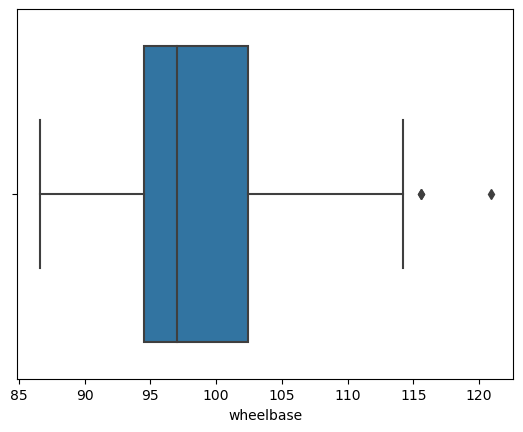

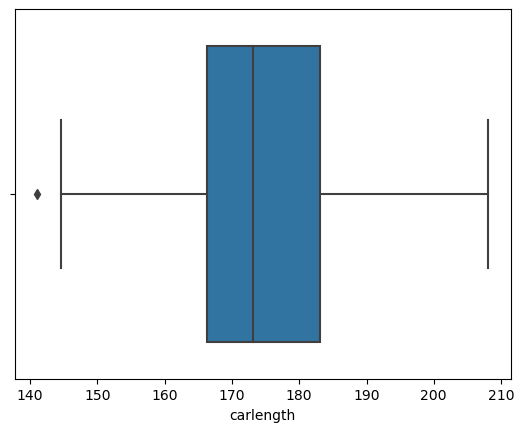

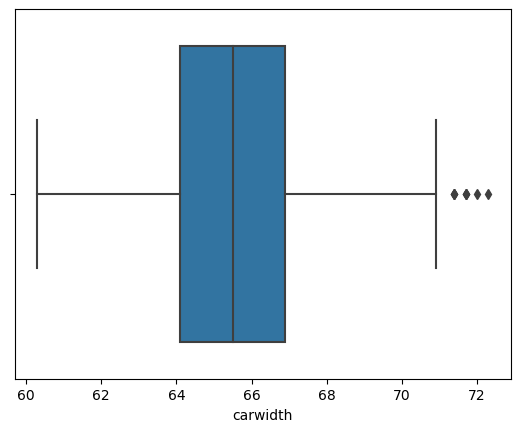

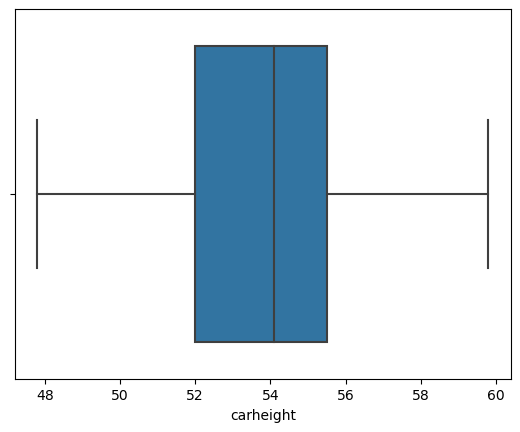

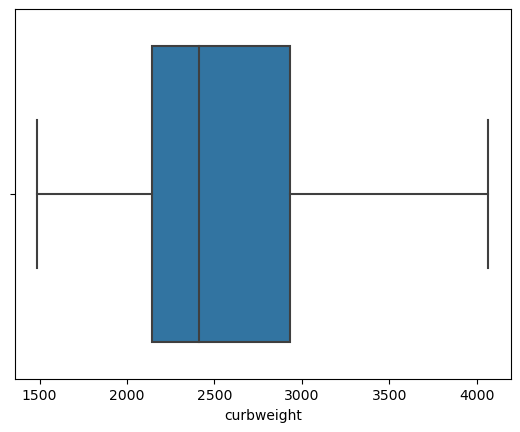

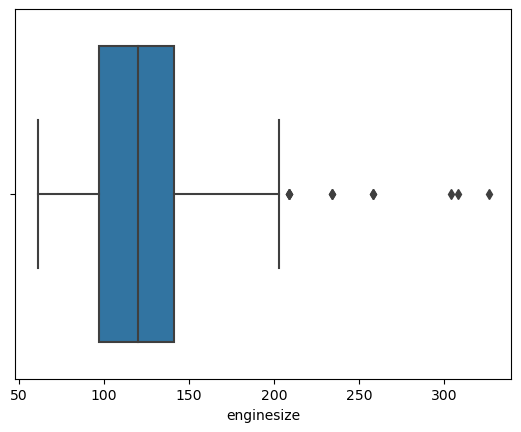

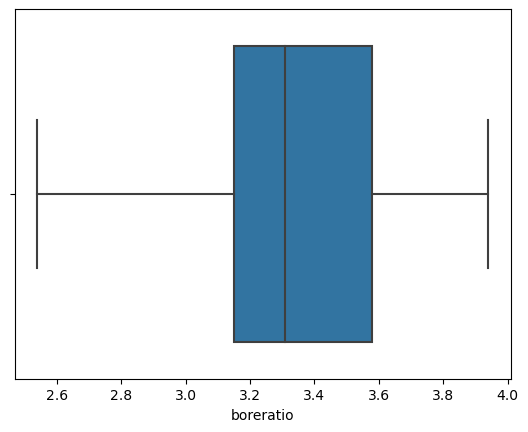

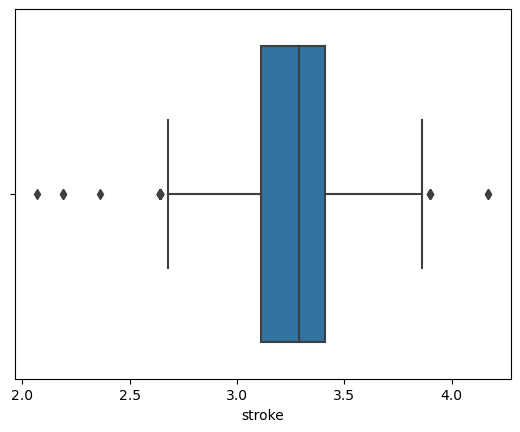

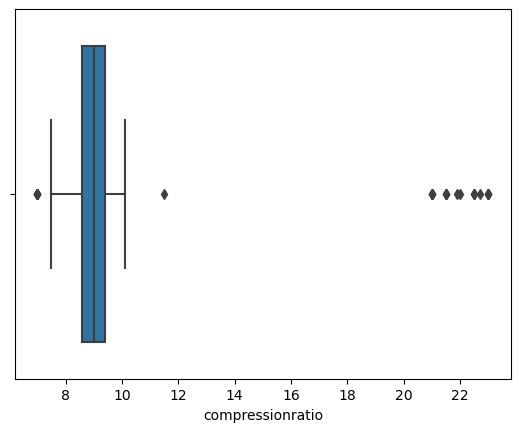

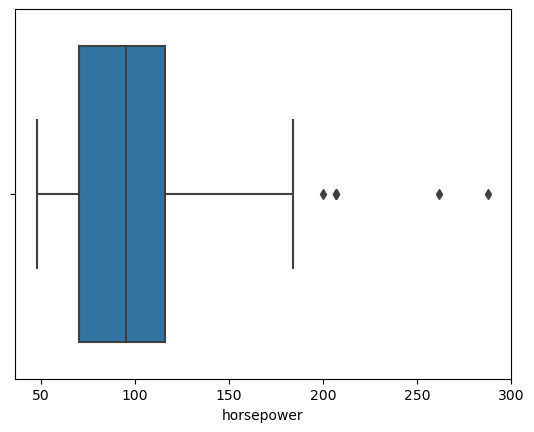

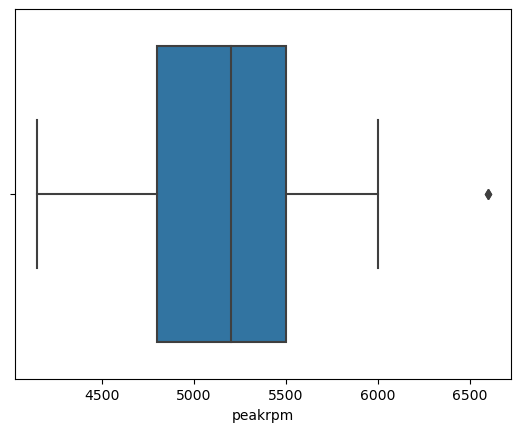

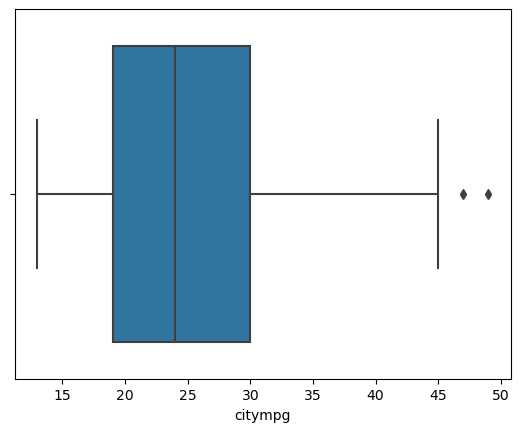

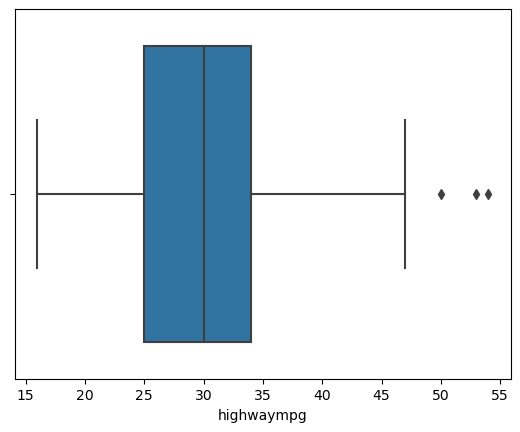

In [24]:
list1= ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']
for column in list1:
    plt.figure()
    sns.boxplot(x=column,data=Data)
    plt.show()

There is two no outliers is present in boreratio in Dataset.

## Data Visualization

In [25]:
Data.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


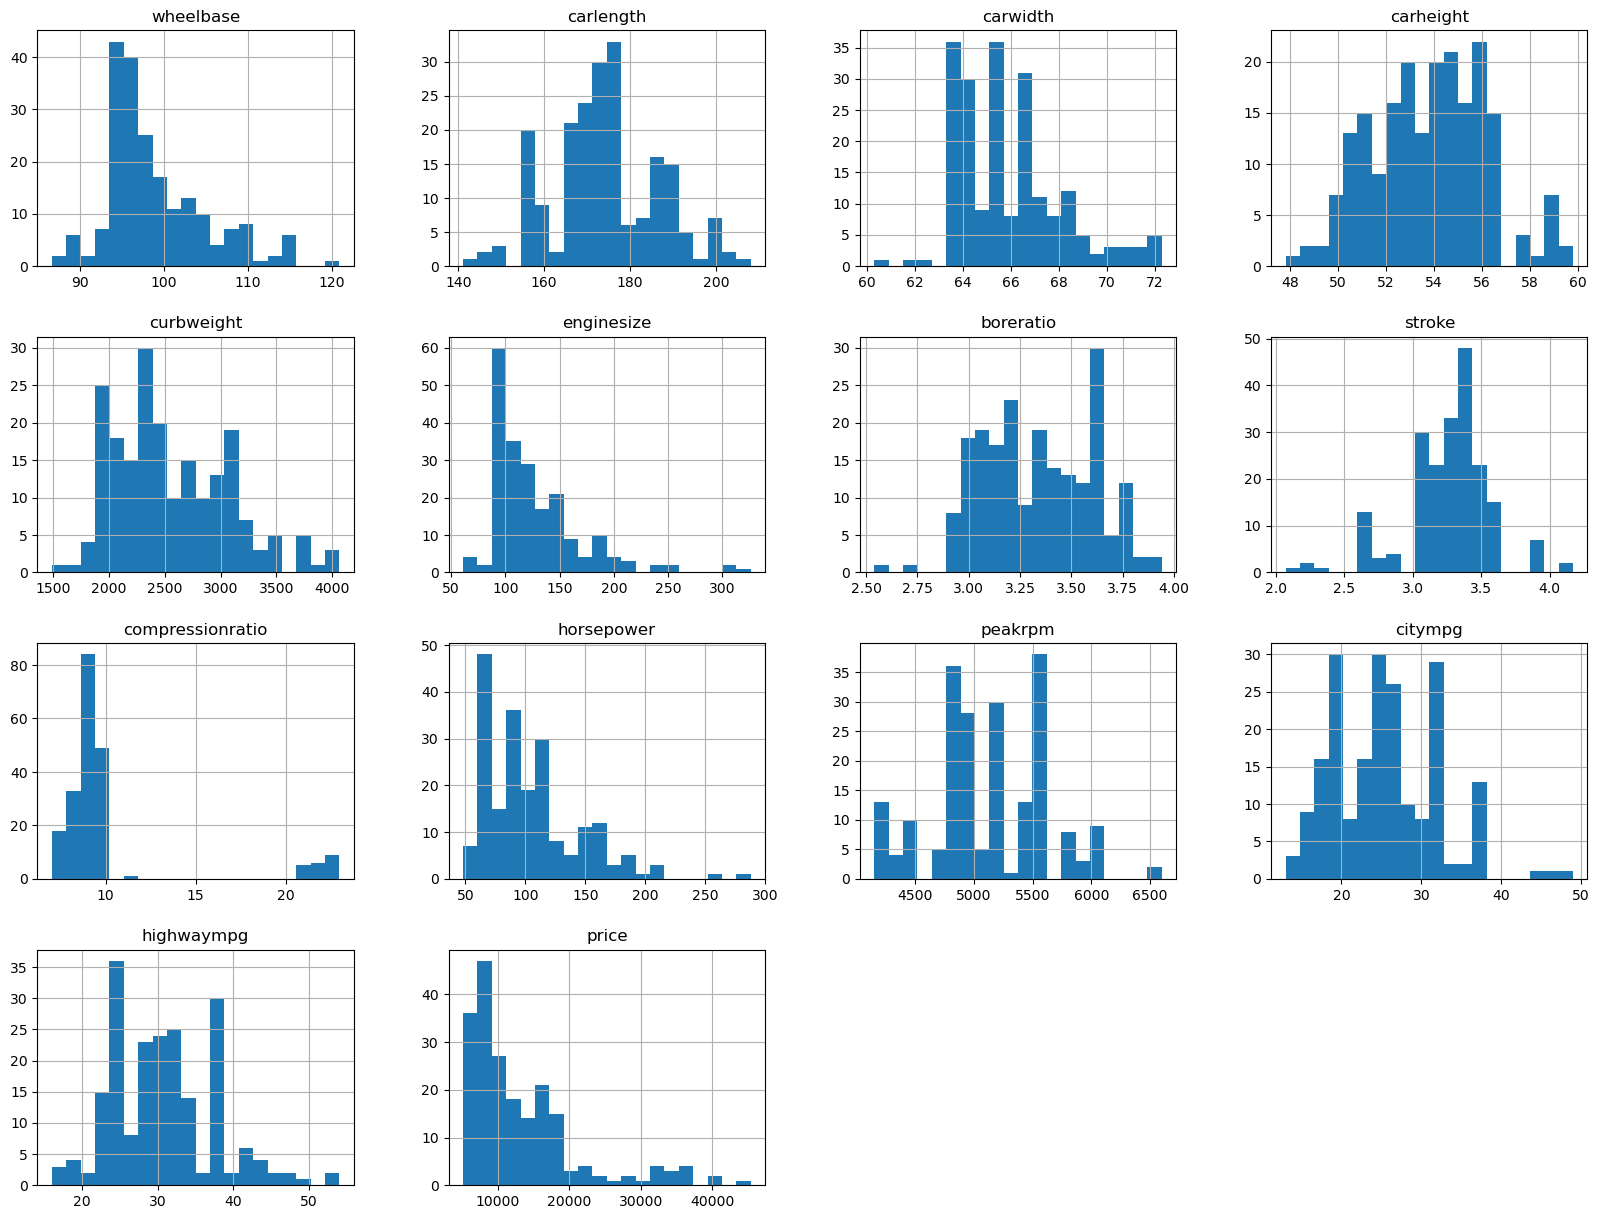

In [26]:
num_features = ['wheelbase', 'carlength', 'carwidth',
                'carheight', 'curbweight', 'enginesize',
                'boreratio', 'stroke', 'compressionratio',
                'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

Data[num_features].hist(bins=20, figsize=(20, 15))
plt.show()

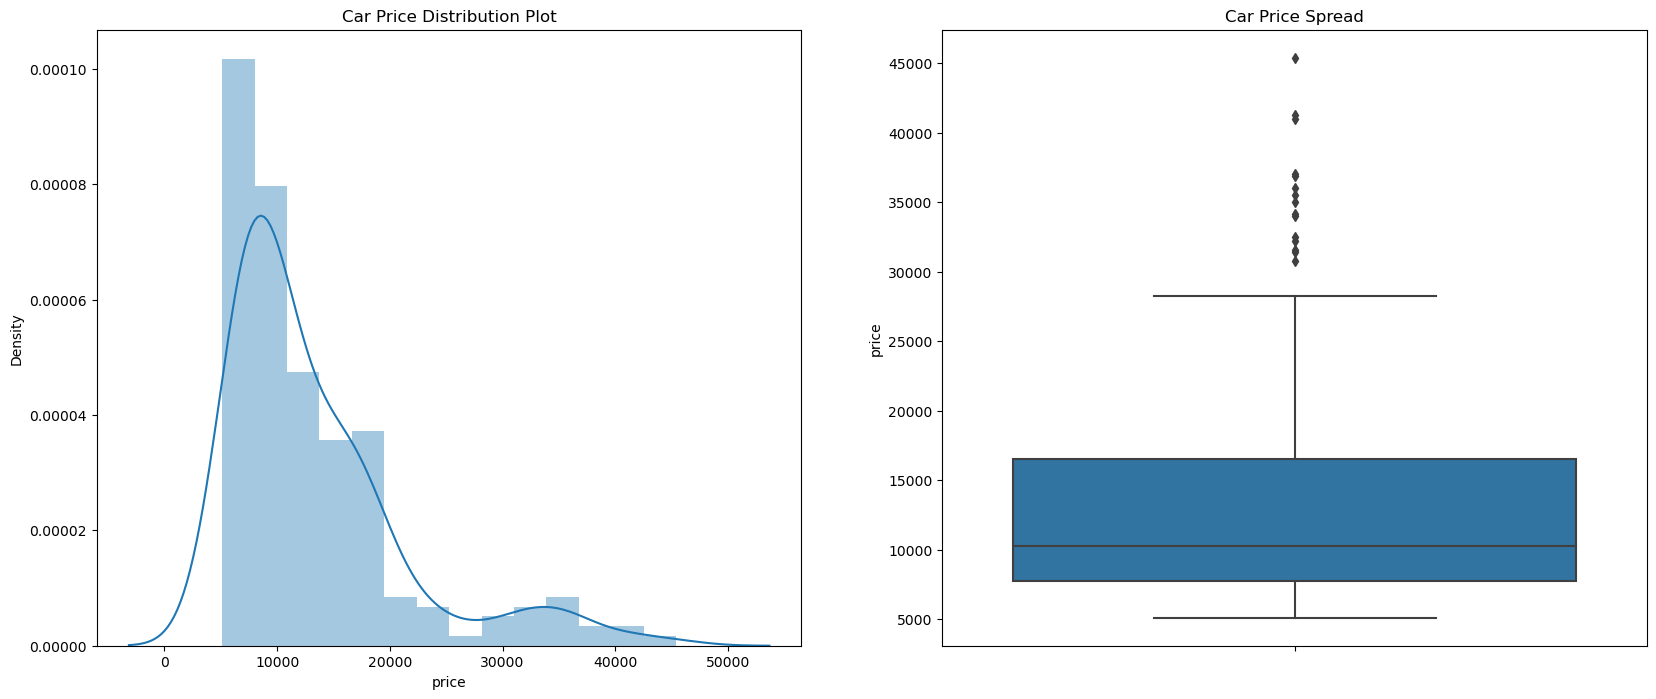

In [27]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(Data.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=Data.price)

plt.show()

#### Facts :

The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).
There is a significant difference between the mean and the median of the price distribution.
The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)

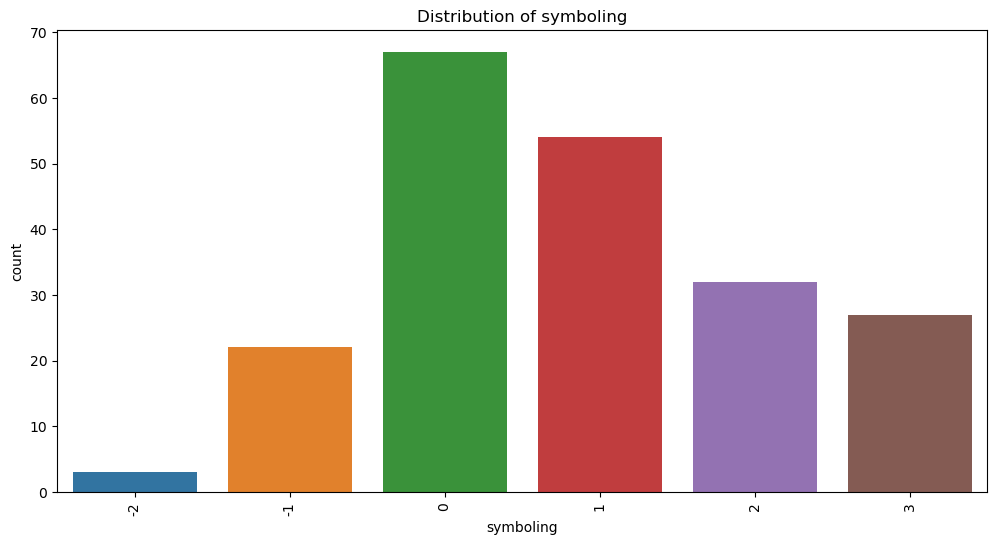

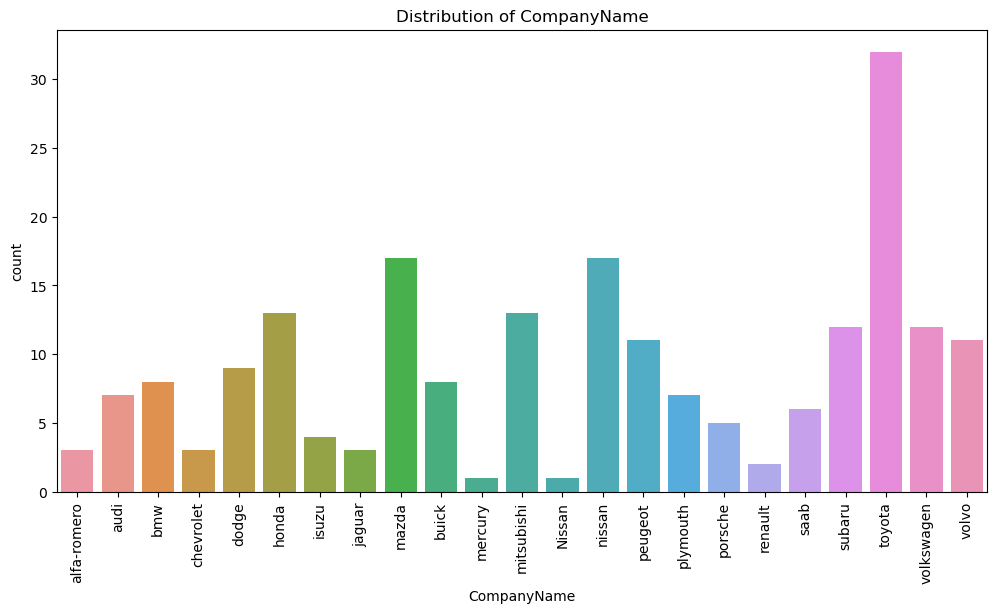

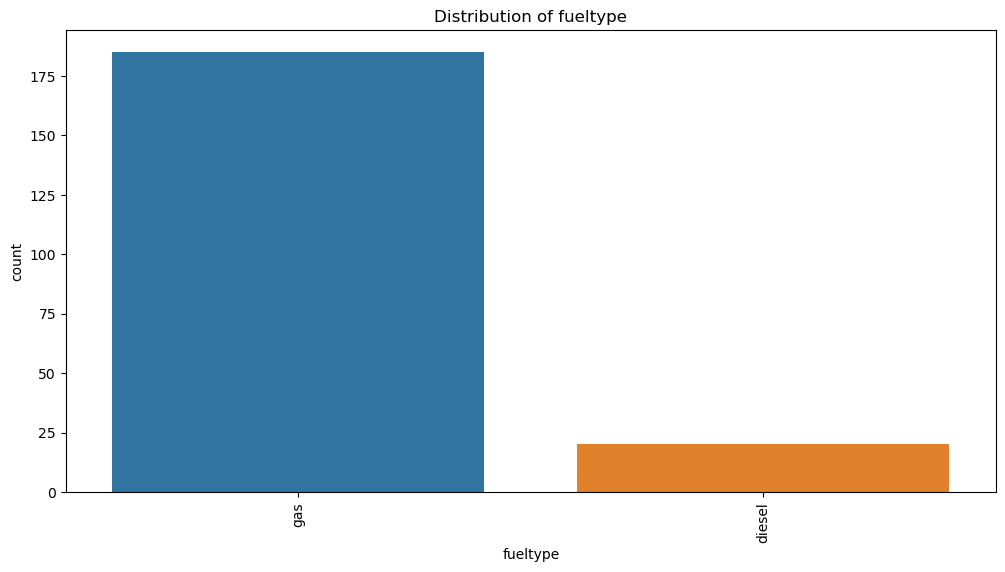

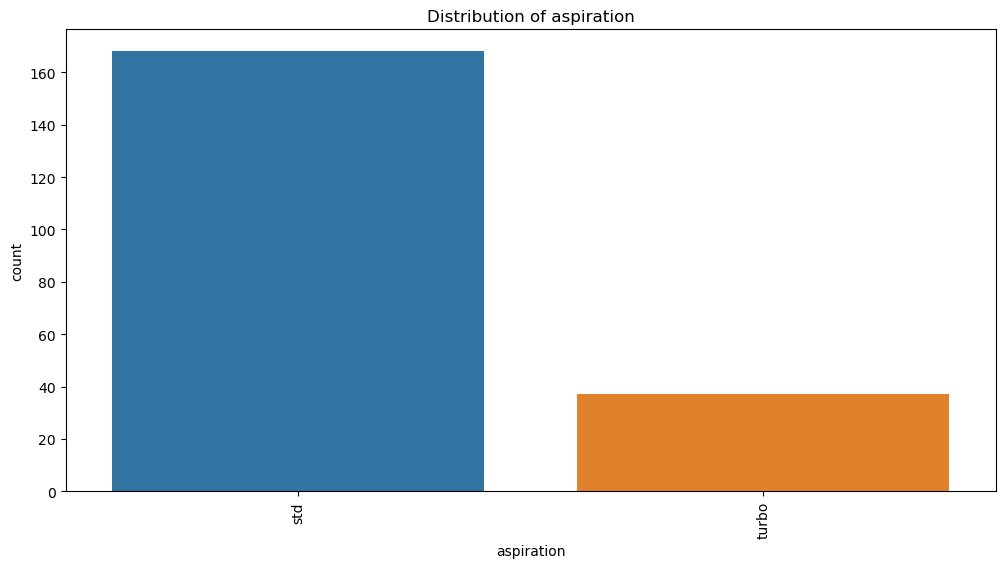

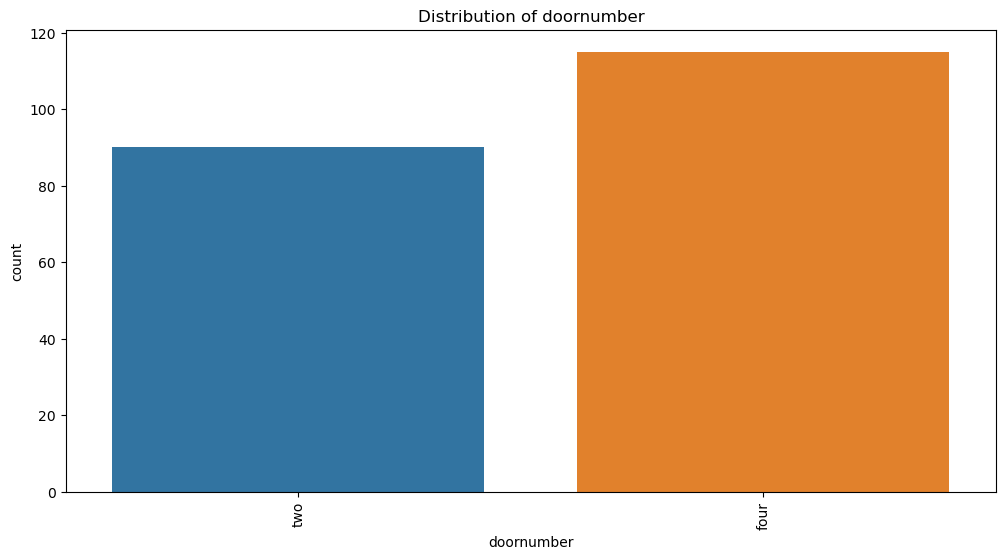

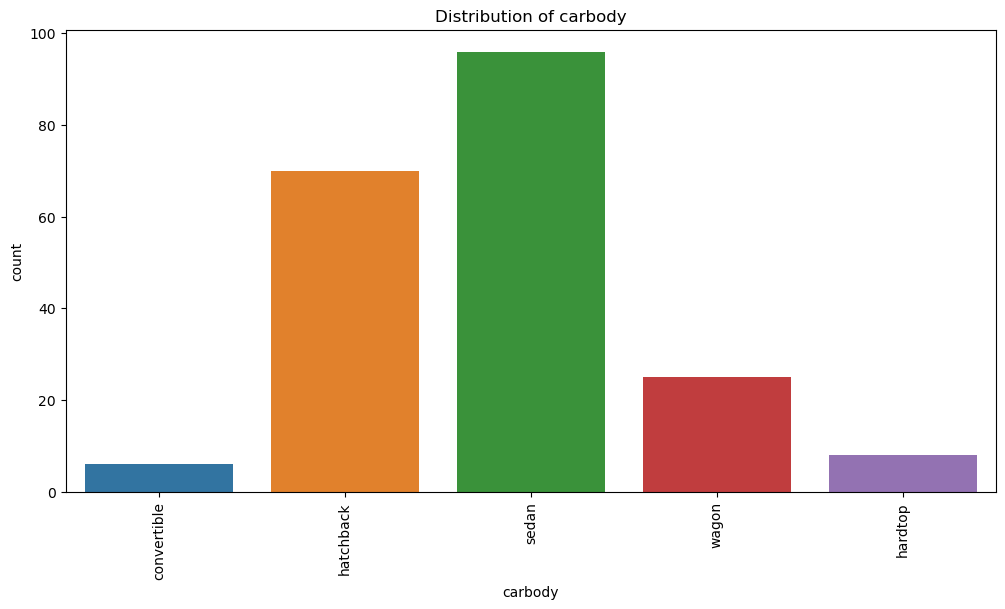

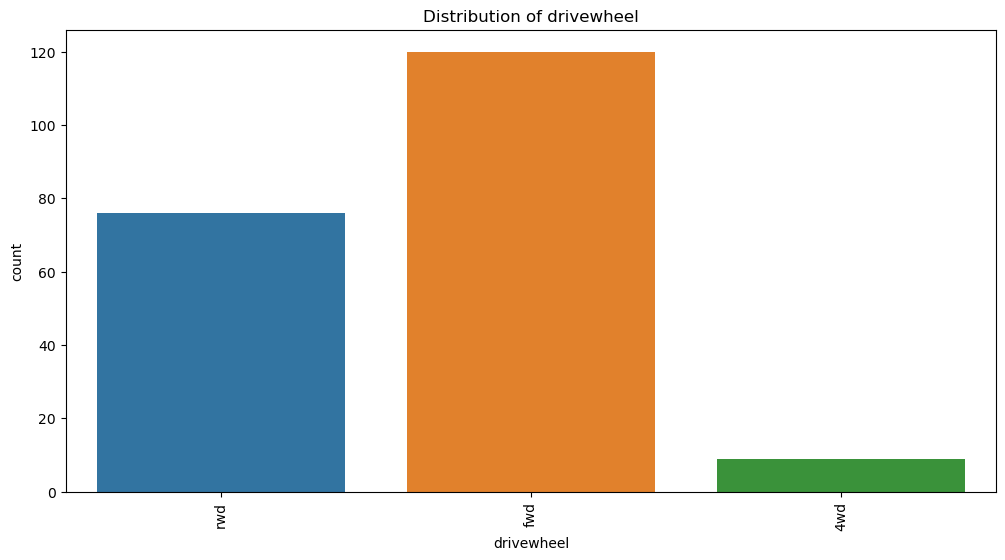

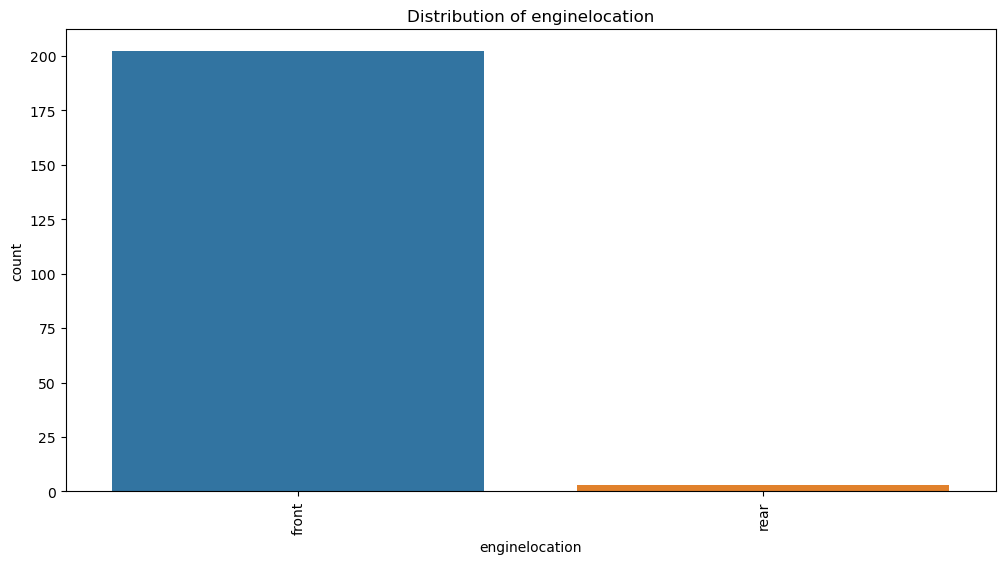

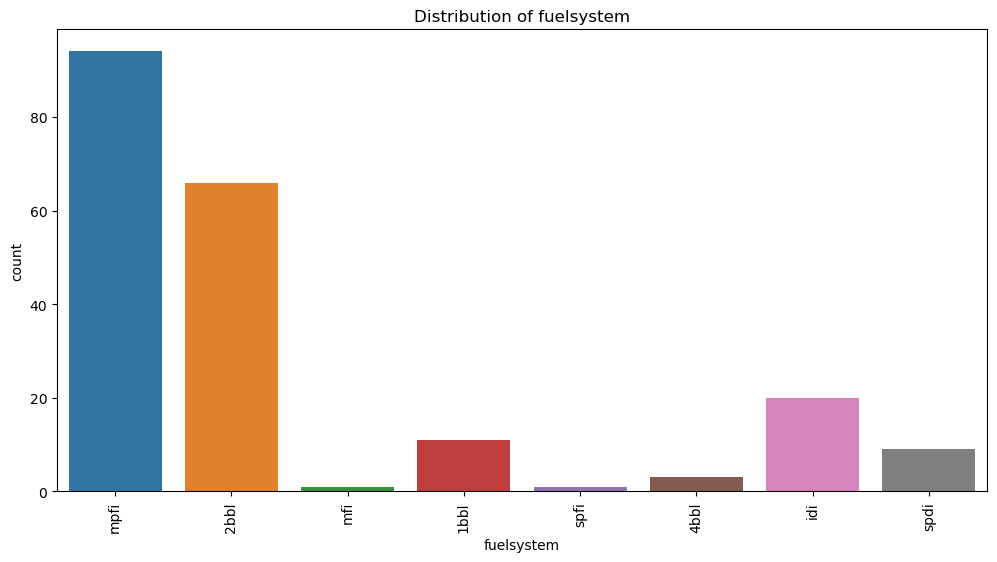

In [28]:
car_features = ['symboling','CompanyName','fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'fuelsystem']

for feature in car_features:
    plt.figure(figsize=(12,6))
    sns.countplot(x=feature, data=Data)
    plt.xticks(rotation=90)
    plt.title(f"Distribution of {feature}")
    plt.show()

#### Inference :
1. It seems that the symboling with 0 and 1 values have high number of rows (i.e. They are most sold.)
2. Toyota seemed to be favored car company.
3. Number of gas fueled cars are more than diesel.
4. Standard aspiration is mostly used.
5. four number of door is greater than two no of door in car.
6. sedan is the top car type prefered.
7. 4wd drivewheel type is rearly used.
8. 201 out of 205 enginelocation is front.
9. mpfi and 2bbl those two fuelsystem is mostly used as compare to other.

<Figure size 2500x600 with 0 Axes>

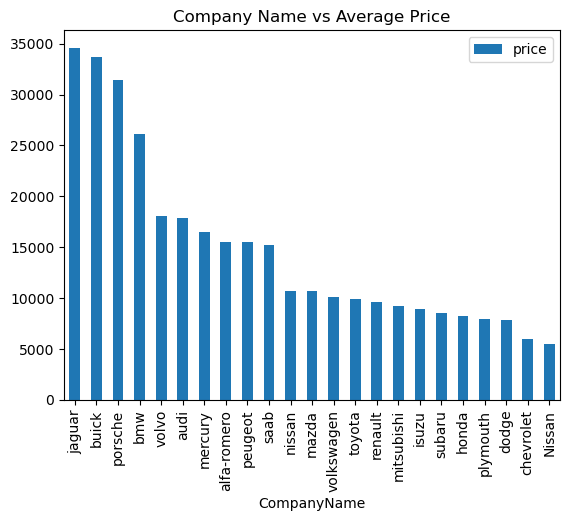

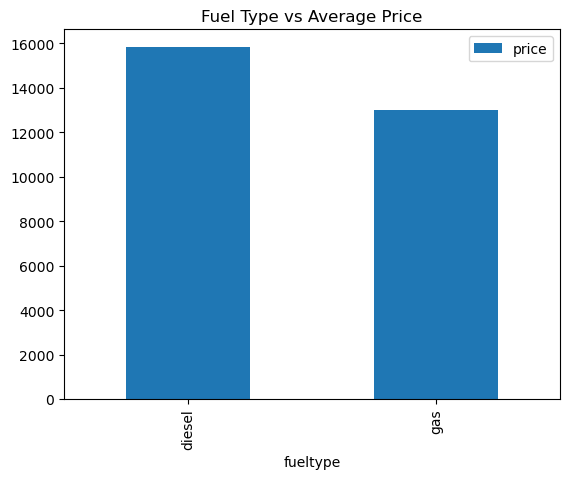

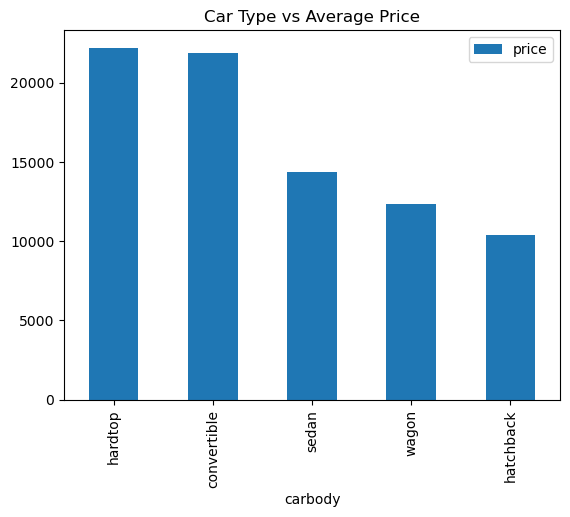

In [29]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(Data.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df = pd.DataFrame(Data.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(Data.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

#### Inference :
1. Jaguar and Buick seem to have highest average price.
2. diesel has higher average price than gas.
3. hardtop and convertible have higher average price.

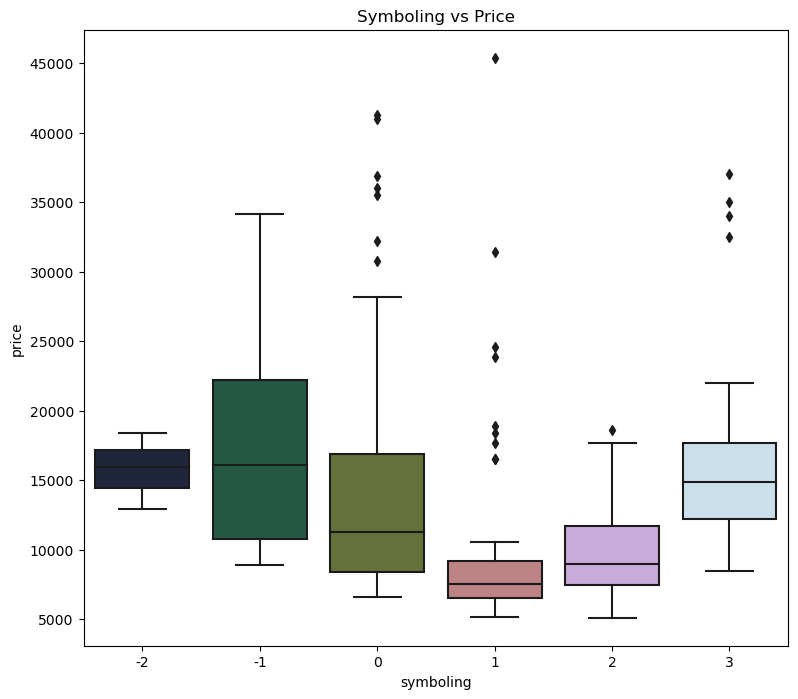

In [30]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=Data.symboling, y=Data.price, palette=("cubehelix"))

plt.show()

The cars with -1 symboling seems to be high priced (as it makes sense too, insurance risk rating -1 is quite good). But it seems that symboling with 3 value has the price range similar to -2 value. There is a dip in price at symboling 1.

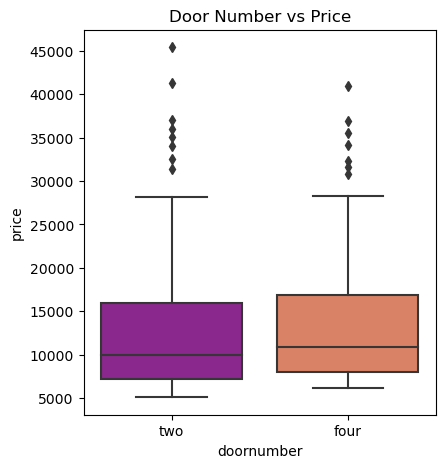

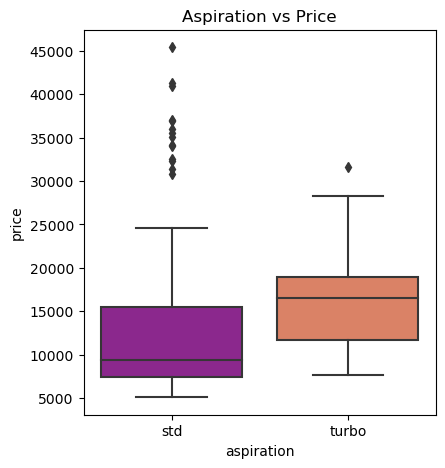

In [31]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=Data.doornumber, y=Data.price, palette=("plasma"))

plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=Data.aspiration, y=Data.price, palette=("plasma"))
plt.show()


#### Inference :
doornumber variable is not affacting the price much. There is no sugnificant difference between the categories in it.        
It seems aspiration with turbo have higher price range than the std(though it has some high values outside the whiskers.)

##### Let's find the relationship between each feature with others.

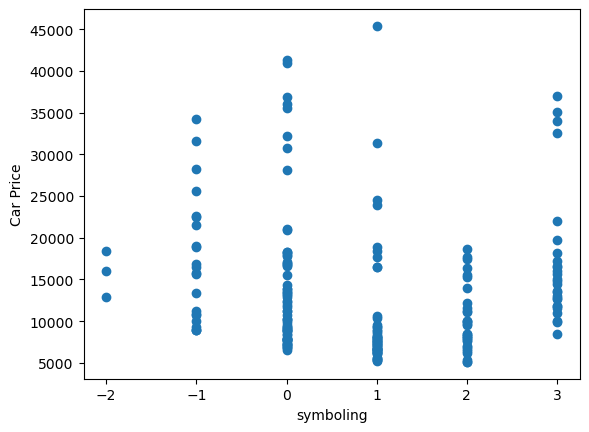

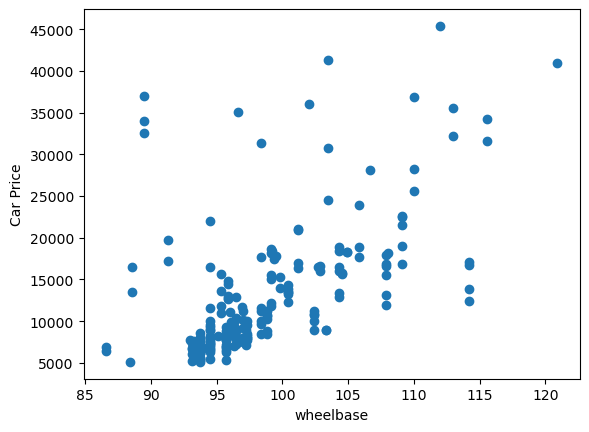

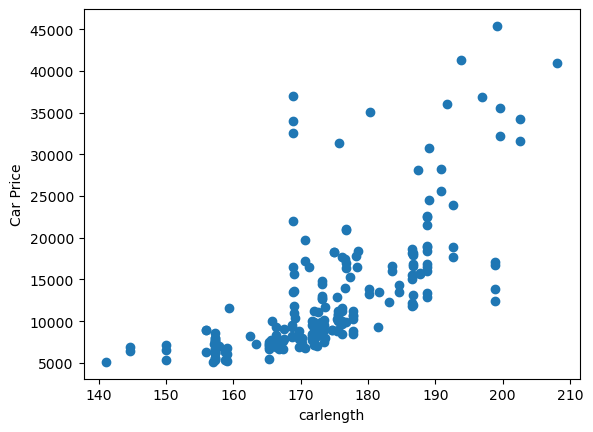

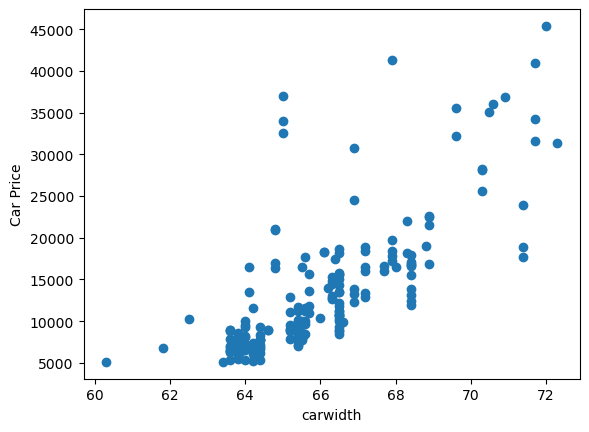

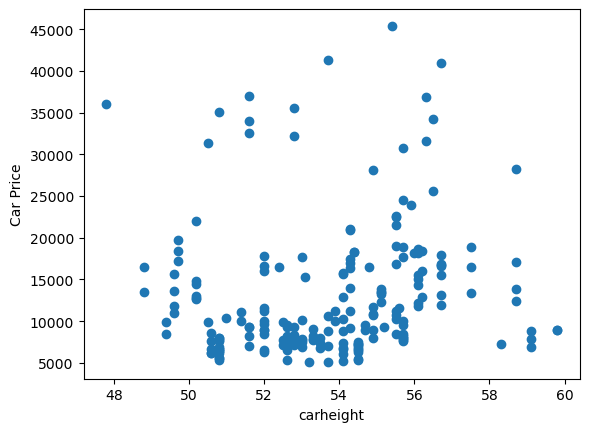

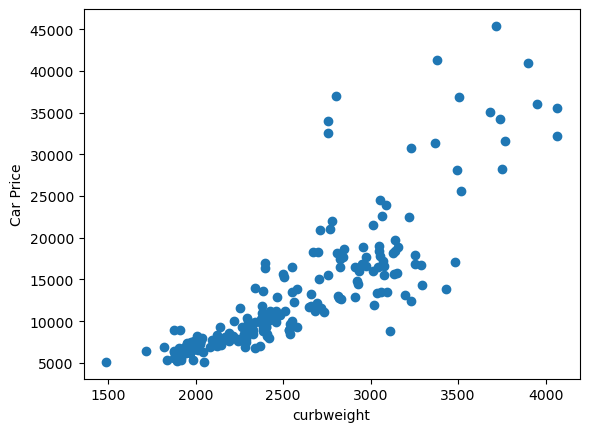

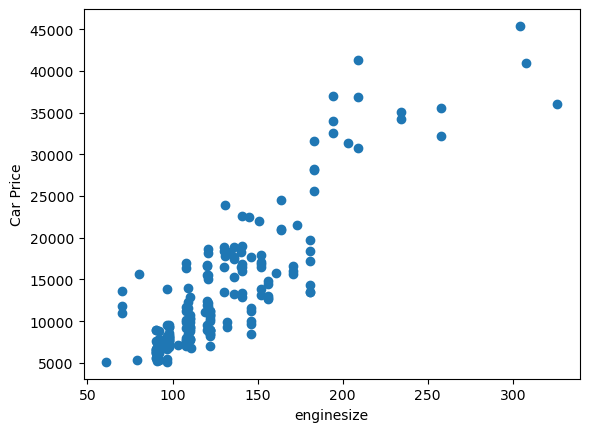

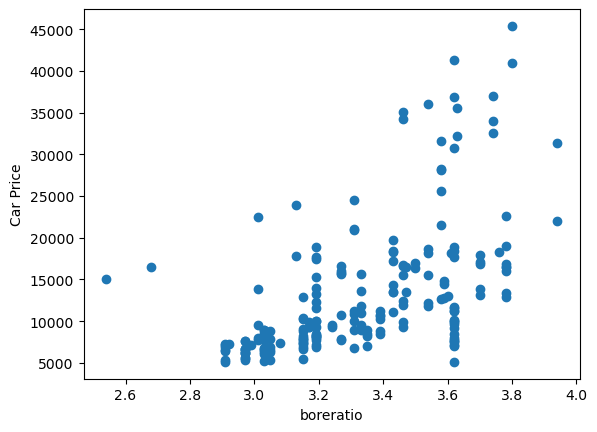

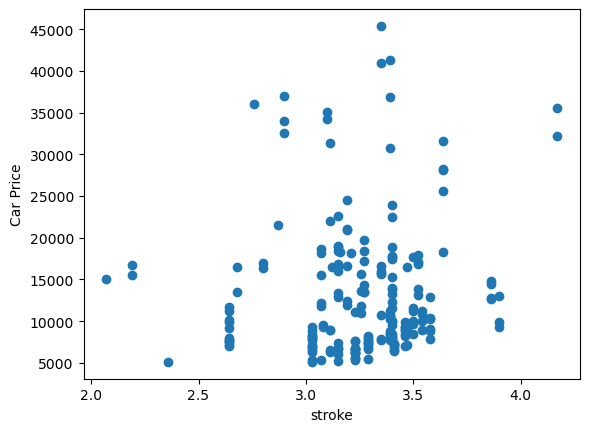

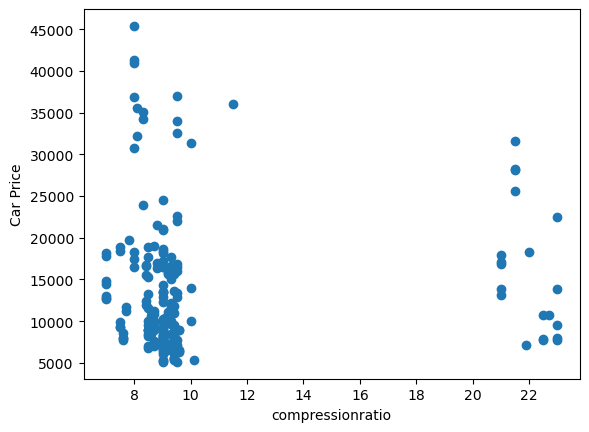

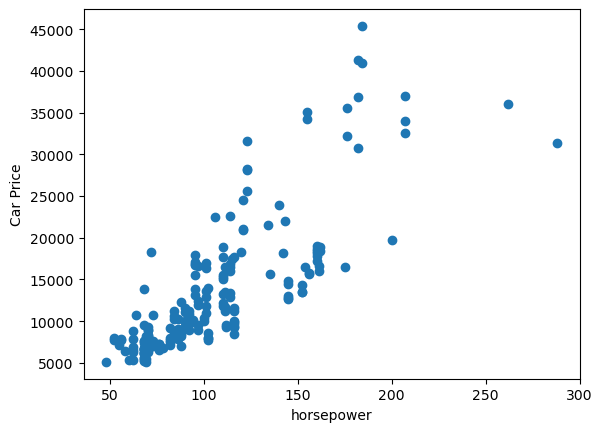

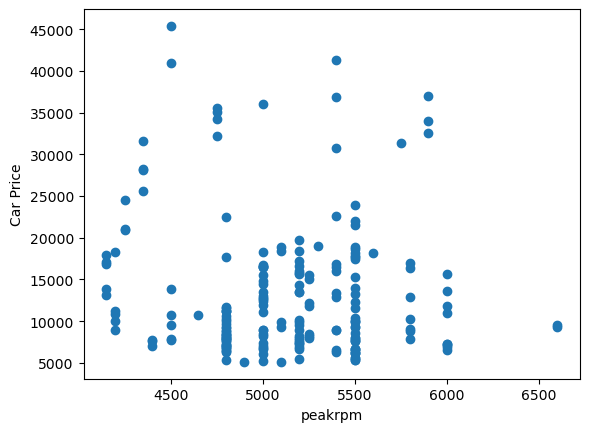

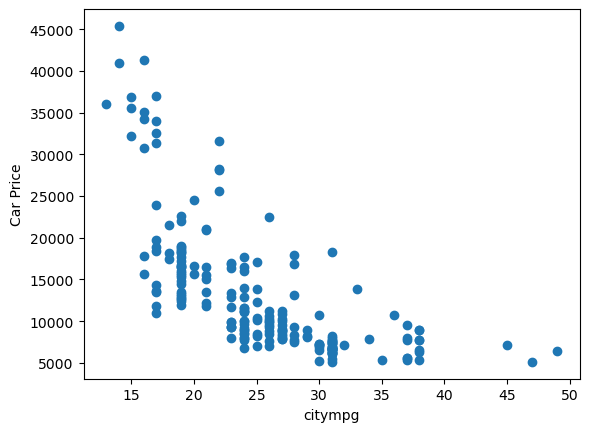

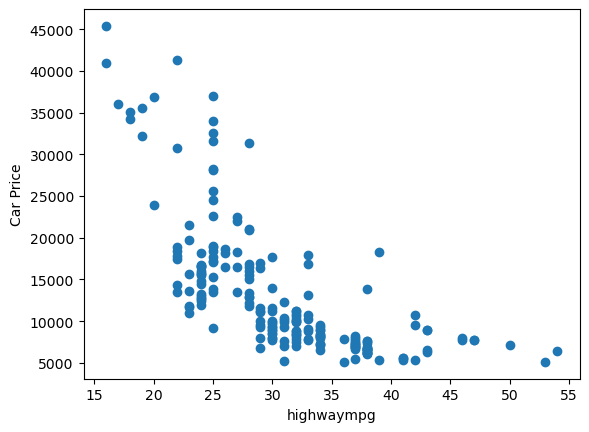

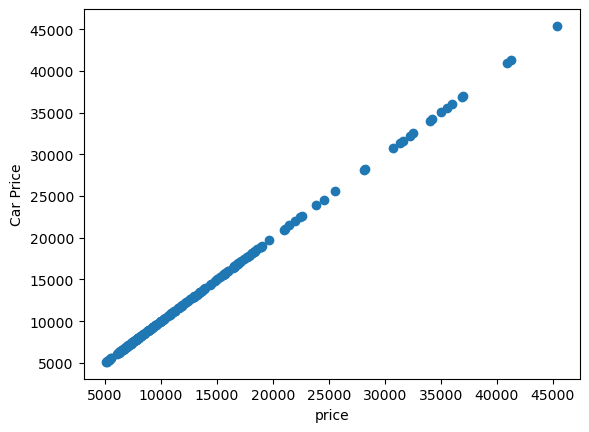

In [32]:
# Now let's find the relationship between independent and dependent numerical features

for feature in numerical_feature:
    if feature not in ["car_ID"]:
        plt.scatter(y=Data["price"], x=Data[feature])
        plt.ylabel("Car Price")
        plt.xlabel(feature)
        plt.show()

#### Inference :
1. carwidth, carlength and curbweight seems to have a poitive correlation with price.                
2. carheight doesn't show any significant trend with price.
3. enginesize, boreratio, horsepower, wheelbase - seem to have a significant positive correlation with price.       
4. citympg, highwaympg - seem to have a significant negative correlation with price.


##### We will now look at the correlation between them and plot with the help of a heatmap.

<AxesSubplot:>

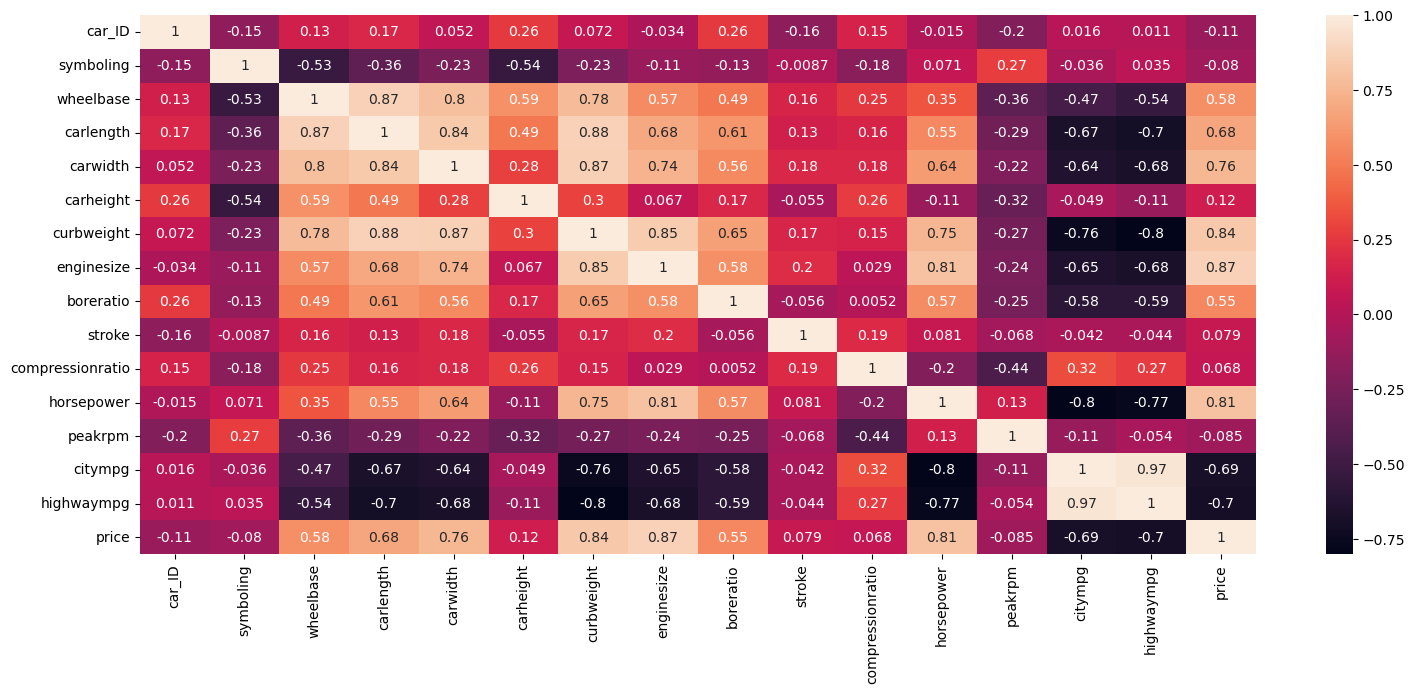

In [33]:
plt.figure(figsize=(18,7))
sns.heatmap(Data.corr(),annot=True)

#### correlation of numerical variables

wheelbase have positive correlation with price of 58%.                 
car length and car width have positive correlation with price of 68% and 76%.        
curbweight have positive correlation with price of 84%.               
enginesize have positive correlation with price of 87%.
boreratio have positive correlation with price of 55%.                 
horsepower have positive correlation with price of 81%.                    
citympg and highwaympg have negative correlation with price of 69% and 70%.

## Feature Engineering

#### Deriving new features

In [34]:
#Fuel economy
Data['fueleconomy'] = (0.55 * Data['citympg']) + (0.45 * Data['highwaympg'])

In [35]:
#Binning the Car Companies based on avg prices of each Company.
Data['price'] = Data['price'].astype('int')
temp = Data.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
Data['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
Data.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


#### Bivariate Analysis

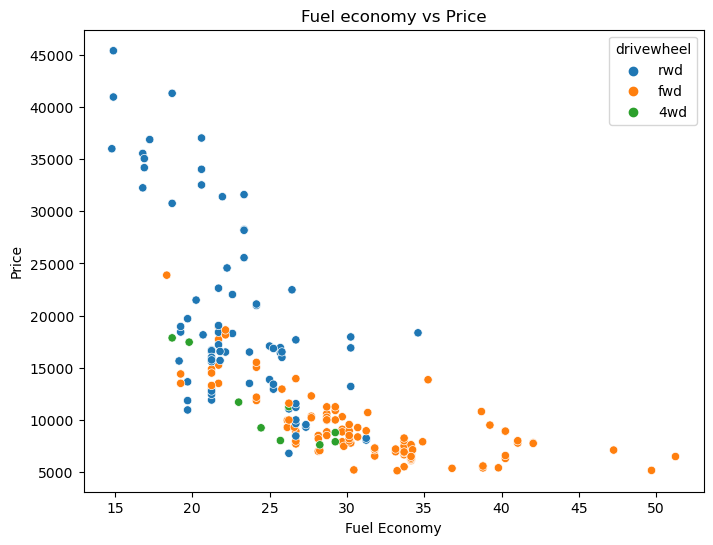

<Figure size 640x480 with 0 Axes>

In [36]:
plt.figure(figsize=(8,6))

plt.title('Fuel economy vs Price')
sns.scatterplot(x=Data['fueleconomy'],y=Data['price'],hue=Data['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

##### Facts :
fueleconomy has an obvios negative correlation with price and is significant.

<Figure size 2500x600 with 0 Axes>

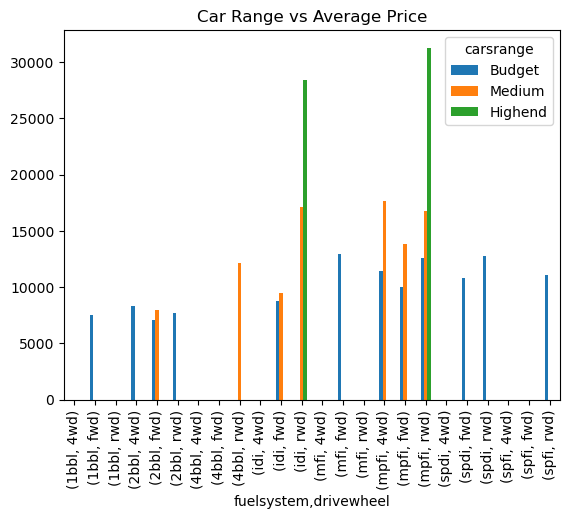

In [37]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(Data.groupby(['fuelsystem','drivewheel','carsrange'])['price'].mean().unstack(fill_value=0))
df.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()

##### Facts :
High ranged cars prefer rwd drivewheel with idi or mpfi fuelsystem.

In [38]:
Final_df = Data[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth', 'carsrange']]
Final_df.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Medium


In [39]:
'''['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'fueleconomy', 'carsrange']'''

"['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',\n       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',\n       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',\n       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',\n       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',\n       'price', 'fueleconomy', 'carsrange']"

In [40]:
['symboling', 'car_company', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'carlength', 'carheight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'highwaympg',
       'price'],

(['symboling',
  'car_company',
  'fueltype',
  'aspiration',
  'doornumber',
  'carbody',
  'drivewheel',
  'enginelocation',
  'carlength',
  'carheight',
  'enginetype',
  'cylindernumber',
  'enginesize',
  'fuelsystem',
  'boreratio',
  'stroke',
  'compressionratio',
  'horsepower',
  'peakrpm',
  'highwaympg',
  'price'],)

In [41]:
Final_df.corr()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth
price,1.000000,0.577816,0.835305,0.874145,0.553174,0.808138,-0.696214,0.682921,0.759325
wheelbase,0.577816,1.000000,0.776386,0.569329,0.488750,0.353294,-0.508136,0.874587,0.795144
curbweight,0.835305,0.776386,1.000000,0.850594,0.648480,0.750739,-0.781535,0.877728,0.867032
enginesize,0.874145,0.569329,0.850594,1.000000,0.583774,0.809769,-0.669464,0.683360,0.735433
boreratio,0.553174,0.488750,0.648480,0.583774,1.000000,0.573677,-0.589898,0.606454,0.559150
horsepower,0.808138,0.353294,0.750739,0.809769,0.573677,1.000000,-0.792822,0.552623,0.640732
fueleconomy,-0.696214,-0.508136,-0.781535,-0.669464,-0.589898,-0.792822,1.000000,-0.691472,-0.663419
carlength,0.682921,0.874587,0.877728,0.683360,0.606454,0.552623,-0.691472,1.000000,0.841118
carwidth,0.759325,0.795144,0.867032,0.735433,0.559150,0.640732,-0.663419,0.841118,1.000000


<AxesSubplot:>

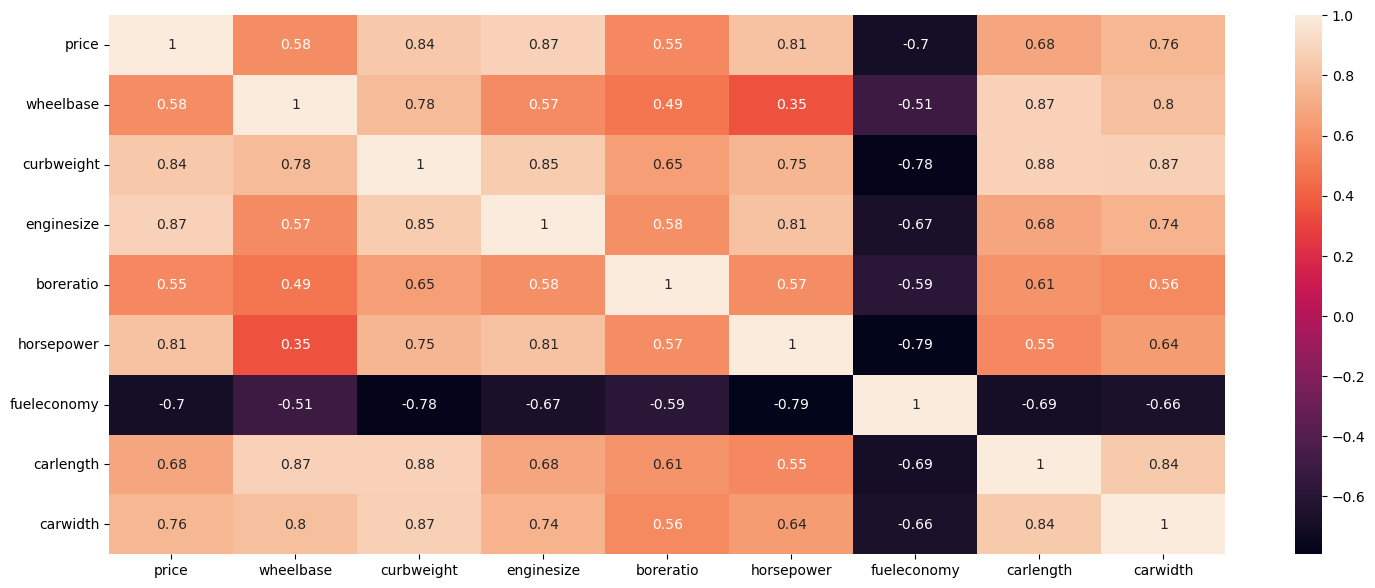

In [42]:
plt.figure(figsize=(18,7))
sns.heatmap(Final_df.corr(),annot=True)

In [43]:
# convert binary category to numbers
Final_df['fueltype'].replace(['gas','diesel'],[1,0],inplace=True)
Final_df['aspiration'].replace(['std','turbo'],[1,0],inplace=True)

In [44]:
Final_df.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
0,13495,1,1,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
1,16500,1,1,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
2,16500,1,1,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,Medium
3,13950,1,1,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Medium
4,17450,1,1,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Medium


In [45]:
# Defining the map function
def dummies(x,Final_df):
    temp = pd.get_dummies(Final_df[x], drop_first = True)
    df = pd.concat([Final_df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr
Final_df = dummies('carbody',Final_df)
Final_df = dummies('drivewheel',Final_df)
Final_df = dummies('enginetype',Final_df)
Final_df = dummies('cylindernumber',Final_df)
Final_df = dummies('carsrange',Final_df)

In [46]:
Final_df[0:1].values

array([[1.3495e+04, 1.0000e+00, 1.0000e+00, 8.8600e+01, 2.5480e+03,
        1.3000e+02, 3.4700e+00, 1.1100e+02, 2.3700e+01, 1.6880e+02,
        6.4100e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00]])

In [47]:
Final_df[0:1].columns

Index(['price', 'fueltype', 'aspiration', 'wheelbase', 'curbweight',
       'enginesize', 'boreratio', 'horsepower', 'fueleconomy', 'carlength',
       'carwidth', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd',
       'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six',
       'three', 'twelve', 'two', 'Medium', 'Highend'],
      dtype='object')

In [48]:
Final_df.head(30)

,price,fueltype,aspiration,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
0,13495,1,1,88.6,2548,130,3.47,111,23.70,168.8,64.1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,16500,1,1,88.6,2548,130,3.47,111,23.70,168.8,64.1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,16500,1,1,94.5,2823,152,2.68,154,22.15,171.2,65.5,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,13950,1,1,99.8,2337,109,3.19,102,26.70,176.6,66.2,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,17450,1,1,99.4,2824,136,3.19,115,19.80,176.6,66.4,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
5,15250,1,1,99.8,2507,136,3.19,110,21.70,177.3,66.3,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
6,17710,1,1,105.8,2844,136,3.19,110,21.70,192.7,71.4,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
7,18920,1,1,105.8,2954,136,3.19,110,21.70,192.7,71.4,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
8,23875,1,0,105.8,3086,131,3.13,140,18.35,192.7,71.4,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
9,17859,1,0,99.5,3053,131,3.13,160,18.70,178.2,67.9,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [49]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(Final_df, train_size = 0.7, test_size = 0.3, random_state = 100)

#### MinMaxScalling

In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [95]:
df_train.head()

,fueltype,aspiration,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
122,1,1,0.244828,0.272692,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
125,1,1,0.272414,0.500388,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
166,1,1,0.272414,0.314973,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,1,0.068966,0.411171,0.260377,0.626984,0.262500,0.244170,0.450407,0.316667,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
199,1,0,0.610345,0.647401,0.260377,0.746032,0.475000,0.122085,0.775610,0.575000,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [53]:
df_train.describe()

,price,fueltype,aspiration,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,13056.335664,0.909091,0.818182,0.411141,0.407878,0.241351,0.497946,0.227302,0.358265,0.525476,0.461655,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.405594,0.118881
std,7807.031621,0.288490,0.387050,0.205581,0.211269,0.154619,0.207140,0.165511,0.185980,0.204848,0.184517,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.492733,0.324786
min,5118.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7554.000000,1.000000,1.000000,0.272414,0.245539,0.135849,0.305556,0.091667,0.198903,0.399187,0.304167,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10198.000000,1.000000,1.000000,0.341379,0.355702,0.184906,0.500000,0.191667,0.344307,0.502439,0.425000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16465.000000,1.000000,1.000000,0.503448,0.559542,0.301887,0.682540,0.283333,0.512346,0.669919,0.550000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,41315.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


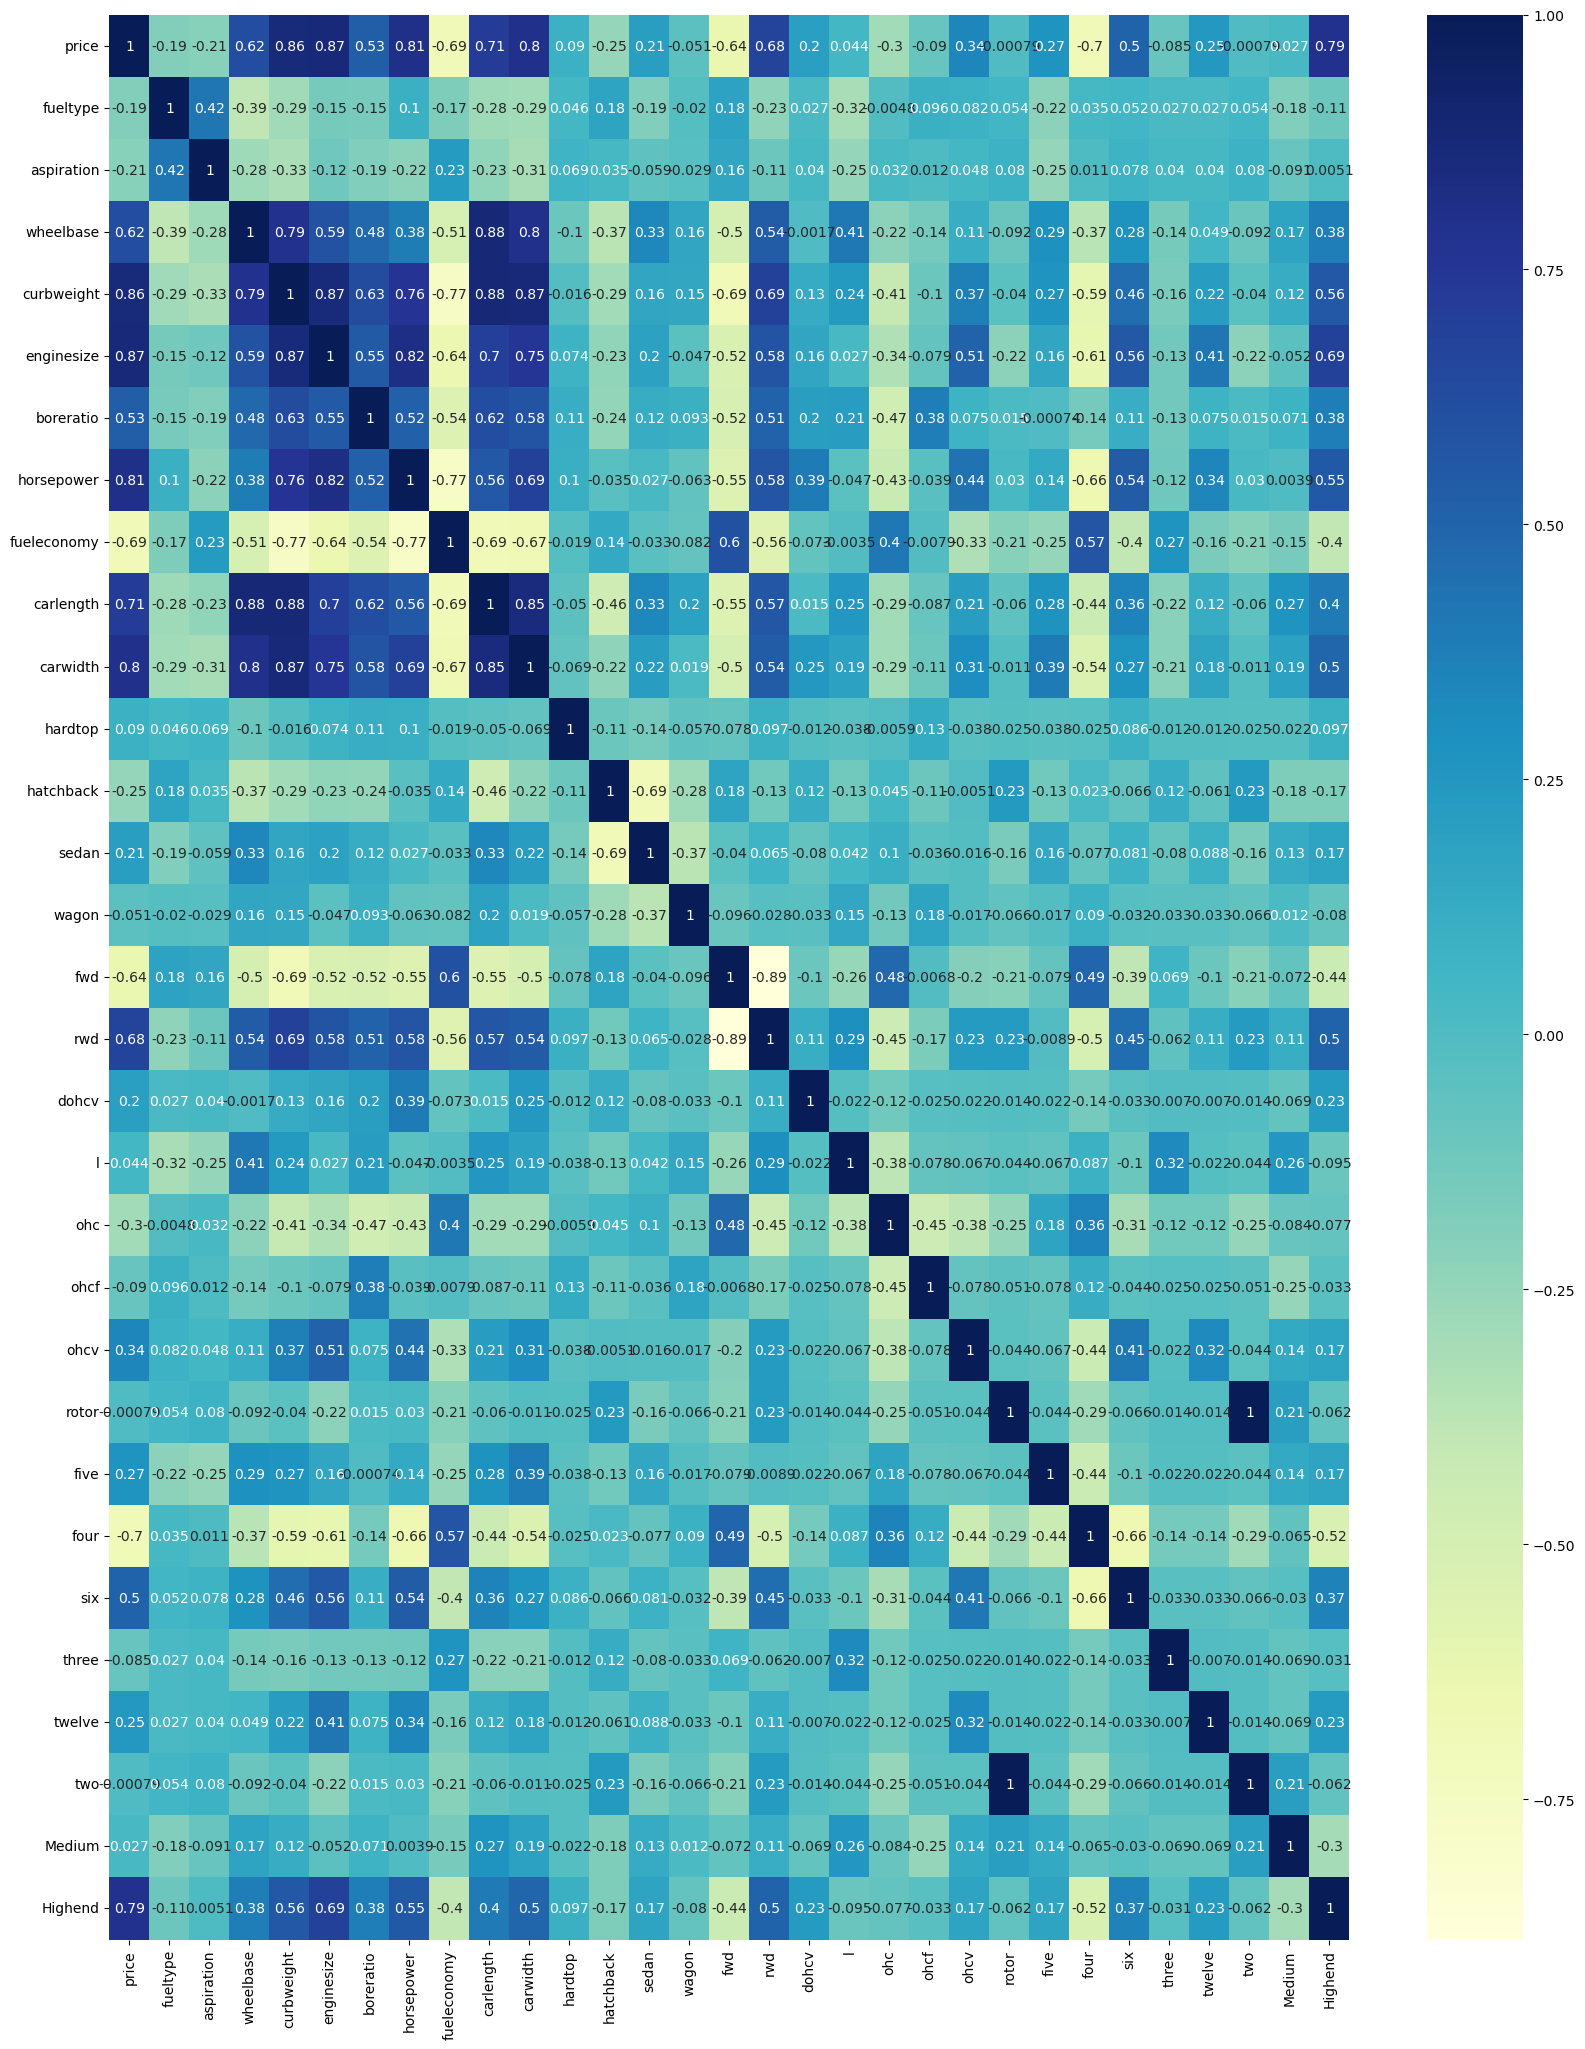

In [54]:
#Correlation using heatmap
plt.figure(figsize = (20, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Highly correlated variables to price are - curbweight, enginesize, horsepower,carwidth and highend.

## Model Building

In [55]:
#Dividing data into X and y variables
y_train = df_train.pop('price')
X_train = df_train

In [56]:
y_train

122     7609
125    22018
166     9538
1      16500
199    18950
       ...  
87      9279
103    13499
67     25552
24      6229
8      23875
Name: price, Length: 143, dtype: int32

In [57]:
X_train

,fueltype,aspiration,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
122,1,1,0.244828,0.272692,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
125,1,1,0.272414,0.500388,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
166,1,1,0.272414,0.314973,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,1,0.068966,0.411171,0.260377,0.626984,0.262500,0.244170,0.450407,0.316667,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
199,1,0,0.610345,0.647401,0.260377,0.746032,0.475000,0.122085,0.775610,0.575000,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,1,0,0.334483,0.354926,0.184906,0.388889,0.283333,0.311385,0.508943,0.425000,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
103,1,1,0.475862,0.609775,0.452830,0.595238,0.433333,0.189300,0.707317,0.516667,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
67,0,0,0.806897,0.786268,0.460377,0.714286,0.312500,0.234568,0.809756,0.833333,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1
24,1,1,0.244828,0.185803,0.109434,0.230159,0.083333,0.530864,0.263415,0.291667,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [58]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [60]:
rfe = RFE(estimator=LinearRegression(), n_features_to_select=10)
# fit the model
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [61]:
X_train.columns[rfe.support_]

Index(['curbweight', 'horsepower', 'fueleconomy', 'carwidth', 'hatchback',
       'sedan', 'wagon', 'dohcv', 'twelve', 'Highend'],
      dtype='object')

In [62]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,curbweight,horsepower,fueleconomy,carwidth,hatchback,sedan,wagon,dohcv,twelve,Highend
122,0.272692,0.083333,0.530864,0.291667,0,1,0,0,0,0
125,0.500388,0.395833,0.213992,0.666667,1,0,0,0,0,1
166,0.314973,0.266667,0.344307,0.308333,1,0,0,0,0,0
1,0.411171,0.262500,0.244170,0.316667,0,0,0,0,0,0
199,0.647401,0.475000,0.122085,0.575000,0,0,1,0,0,0


In [63]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [64]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     172.1
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           1.29e-70
Time:                        20:06:59   Log-Likelihood:                -1295.2
No. Observations:                 143   AIC:                             2612.
Df Residuals:                     132   BIC:                             2645.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1690.9449   1528.203      1.106      

p-vale of twelve seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [65]:
X_train_new = X_train_rfe.drop(["twelve"], axis = 1)

In [66]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     187.9
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           4.25e-71
Time:                        20:06:59   Log-Likelihood:                -1296.9
No. Observations:                 143   AIC:                             2614.
Df Residuals:                     133   BIC:                             2643.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2352.9297   1493.525      1.575      

In [67]:
X_train_new = X_train_new.drop(["fueleconomy"], axis = 1)

In [68]:
X_train_new = build_model(X_train_new,y_train)
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     209.5
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           7.85e-72
Time:                        20:06:59   Log-Likelihood:                -1298.0
No. Observations:                 143   AIC:                             2614.
Df Residuals:                     134   BIC:                             2641.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4012.9724    948.417      4.231      0.0

,Features,VIF
0,const,26.90
1,curbweight,8.10
5,sedan,6.07
4,hatchback,5.63
3,carwidth,5.14
2,horsepower,3.61
6,wagon,3.58
8,Highend,1.63
7,dohcv,1.46


dropping curbweight because of high VIF value. (shows that curbweight has high multicollinearity.)

In [69]:
X_train_new = X_train_new.drop(["curbweight"], axis = 1)

In [70]:
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           4.70e-70
Time:                        20:06:59   Log-Likelihood:                -1305.3
No. Observations:                 143   AIC:                             2627.
Df Residuals:                     135   BIC:                             2650.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3963.2873    994.313      3.986      0.0

,Features,VIF
0,const,26.89
4,sedan,6.06
3,hatchback,5.54
5,wagon,3.47
1,horsepower,2.50
2,carwidth,2.22
7,Highend,1.56
6,dohcv,1.21


dropping sedan because of high VIF value.

In [71]:
X_train_new = X_train_new.drop(["sedan"], axis = 1)

In [72]:
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     237.6
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           1.68e-69
Time:                        20:06:59   Log-Likelihood:                -1309.6
No. Observations:                 143   AIC:                             2633.
Df Residuals:                     136   BIC:                             2654.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1737.5165    647.700      2.683      0.0

,Features,VIF
0,const,10.82
1,horsepower,2.39
2,carwidth,2.09
6,Highend,1.55
3,hatchback,1.23
5,dohcv,1.21
4,wagon,1.11


dropping wagon because of high p-value.

In [73]:
X_train_new = X_train_new.drop(["wagon"], axis = 1)

In [74]:
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           1.57e-70
Time:                        20:06:59   Log-Likelihood:                -1310.1
No. Observations:                 143   AIC:                             2632.
Df Residuals:                     137   BIC:                             2650.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1607.5592    634.784      2.532      0.0

,Features,VIF
0,const,10.39
1,horsepower,2.39
2,carwidth,2.08
5,Highend,1.53
4,dohcv,1.21
3,hatchback,1.13


In [75]:
#Dropping dohcv to see the changes in model statistics
X_train_new = X_train_new.drop(["dohcv"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           1.04e-67
Time:                        20:06:59   Log-Likelihood:                -1320.0
No. Observations:                 143   AIC:                             2650.
Df Residuals:                     138   BIC:                             2665.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2133.8556    666.052      3.204      0.0

,Features,VIF
0,const,10.04
1,horsepower,2.22
2,carwidth,2.08
4,Highend,1.53
3,hatchback,1.10


## Residual Analysis of Model

In [76]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

In [77]:
X_train_new.head()

,const,horsepower,carwidth,hatchback,Highend
122,1.0,0.083333,0.291667,0,0
125,1.0,0.395833,0.666667,1,1
166,1.0,0.266667,0.308333,1,0
1,1.0,0.262500,0.316667,0,0
199,1.0,0.475000,0.575000,0,0


In [78]:
y_train

122     7609
125    22018
166     9538
1      16500
199    18950
       ...  
87      9279
103    13499
67     25552
24      6229
8      23875
Name: price, Length: 143, dtype: int32

In [79]:
#Scaling the test set
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [96]:
df_test.head()

,fueltype,aspiration,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
160,1,1,0.265306,0.132148,0.082969,0.515873,0.116129,1.000000,0.341732,0.200000,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
186,1,1,0.311953,0.219125,0.131004,0.515873,0.212903,0.561694,0.426772,0.315789,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
59,1,1,0.355685,0.271985,0.187773,0.674603,0.206452,0.508287,0.522835,0.421053,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
165,1,1,0.230321,0.214320,0.082969,0.555556,0.387097,0.458564,0.379528,0.157895,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
140,1,1,0.195335,0.202307,0.126638,0.857143,0.135484,0.491713,0.200000,0.136842,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [80]:
#Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

In [82]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]


In [83]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [84]:
X_test_new

,const,horsepower,carwidth,hatchback,Highend
160,1.0,0.116129,0.200000,0,0
186,1.0,0.212903,0.315789,0,0
59,1.0,0.206452,0.421053,1,0
165,1.0,0.387097,0.157895,0,0
140,1.0,0.135484,0.136842,1,0
...,...,...,...,...,...
28,1.0,0.232258,0.221053,0,0
29,1.0,0.600000,0.400000,1,0
182,1.0,0.000000,0.315789,0,0
40,1.0,0.219355,0.000000,0,0


In [101]:
X_test_new.to_csv("carInput.csv",index=True)

In [85]:
y_test

160     7738
186     8495
59      8845
165     9298
140     7603
       ...  
28      8921
29     12964
182     7775
40     10295
128    37028
Name: price, Length: 62, dtype: int32

In [86]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [87]:
y_pred

160     6848.619345
186    10048.936061
59      9955.273693
165    10563.204233
140     4754.064914
           ...     
28      9000.534420
29     15924.573847
182     6656.529699
40      5629.062189
128    31950.739087
Length: 62, dtype: float64

#### Evaluation of test via comparison of y_pred and y_test

In [88]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.9083445552318152

Text(0, 0.5, 'y_pred')

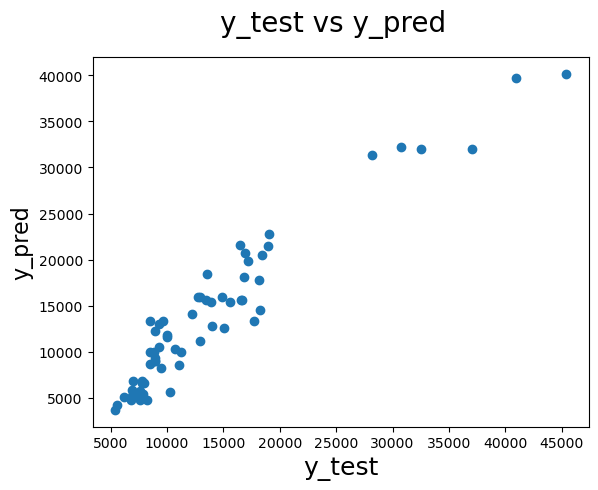

In [89]:
# EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

### Inference :
1. R-sqaured and Adjusted R-squared (extent of fit) - 0.899 and 0.896 - 90% variance explained.
2. F-stats and Prob(F-stats) (overall model fit) - 308.0 and 1.04e-67(approx. 0.0) - Model fir is significant and explained 90% variance is just not by chance.
3. p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.

In [97]:
import pickle
pickle.dump(lm,open('Model_Cpp.pkl','wb'))